## Problem set 3

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.5

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1a, diabetes dataset EDA (10 points)

We will work with the diabetes dataset in problem 1. Please carefully read the description [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) and [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Read the data into a pandas dataframe using the txt file linked [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Perform EDA by going through questions 1-4 from PS2 2a. 

Additionally, prepare two visualizations using column pairs. The two figures should be different types but one of the columns for both plots should be the target variable. Include a caption for each of the figures describing what the plot shows.

In [3]:
# your code here
import pandas as pd
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
print(df.head())
print(df.shape)
print(df.dtypes.to_string())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
(442, 11)
AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64


1. There are 78096 rows and 38 columns. 
2. Data type of each column is printed above. 

In [4]:
print(df['Y'].describe())
print(df['Y'].value_counts())

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64
Y
200    6
72     6
90     5
178    5
71     5
      ..
73     1
222    1
86     1
79     1
57     1
Name: count, Length: 214, dtype: int64


The target variable 'Y' is continuous and has 214 different values of data type int64. 

21


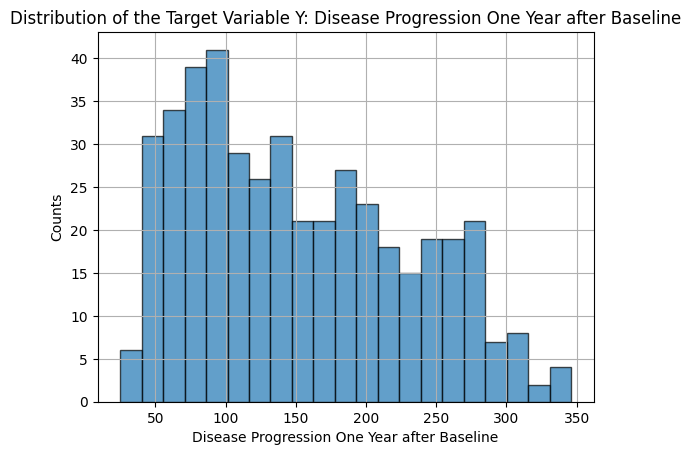

In [5]:
import matplotlib.pyplot as plt
import math 

value = math.floor(math.sqrt(len(df['Y']))) # a good bin value 
print(value)
df['Y'].hist(bins=value, edgecolor='k', alpha=0.7)
plt.title('Distribution of the Target Variable Y: Disease Progression One Year after Baseline')
plt.xlabel('Disease Progression One Year after Baseline')
plt.ylabel('Counts')
plt.show()

# Two Additional Visualizations 

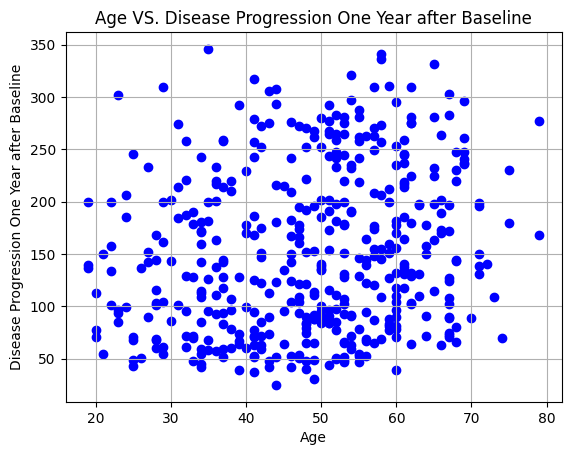

In [6]:
plt.scatter(df['AGE'], df['Y'], color='blue', marker='o')
plt.title('Age VS. Disease Progression One Year after Baseline')
plt.xlabel('Age')
plt.ylabel('Disease Progression One Year after Baseline')
plt.grid(True)
plt.show()

For the above scatter plot, we can see that there is no obvious correlation between 'Age' and the target variable 'Y'. 

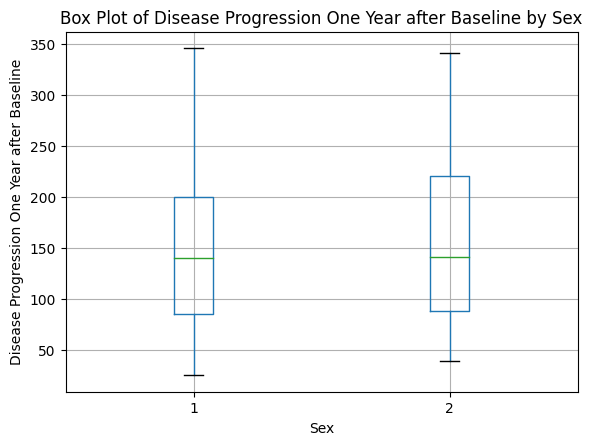

In [7]:
df.boxplot(column='Y', by='SEX')
plt.title('Box Plot of Disease Progression One Year after Baseline by Sex')
plt.suptitle('') 
plt.xlabel('Sex')
plt.ylabel('Disease Progression One Year after Baseline')
plt.grid(True, axis='y')
plt.show()

From the box plot, we can see that both male and female have almost the same disease progression level one year after baseline. 

### Problem 1b, basic split (10 points)

Write a general function that performs basic splitting on a dataset, while also conducting integrity tests on both its inputs and outputs. Let's call the function basic_split. It takes the following arguments as inputs: feature matrix (X), a target variable (y), train_size, val_size, test_size, and random_state. The output of the function should be: X_train, y_train, X_val, y_val, X_test, y_test. 

Perform the following tests inside the function and raise a value error with a message if one or more of the tests fail.

Test the inputs:
- the sum of train_size, val_size, test_size is 1
- random_state is an integer

Use train_test_split.

Test the outputs:
- check that the output sizes are what you want them to be

Note that in principle you could add more tests. For example:
- test if X is a 2d pandas data frame
- test if y is a 1d pandas series
- check if the number of rows in X is the same as the length of y

These tests are included in train_test_split, so we don't need to explicitly add them to our code. However, if you were to split your data manually without train_test_split, it would be a good idea to add these additional tests and potentially more.

Apply the function to the diabetes dataset with train_size = 0.6, val_size = 0.2, and test_size = 0.2. Print out the head of X_train, X_val, and X_test. Make sure that you get the same points in each set every time you rerun the cell (a.k.a., check for reproducability).

This function is general purpose, you'll be able to reuse it for any project if you want to perform basic split on your data.

In [8]:
y = df['Y'] 
X = df.loc[:, df.columns != 'Y']
print(y.shape)
print(X.shape)

(442,)
(442, 10)


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

# your code here
def basic_split(X, y, train_size, val_size, test_size, random_state):

    if not isinstance(random_state, int):
        raise ValueError("random_state should be an integer.")
        
    if not (train_size + val_size + test_size) == 1:
        raise ValueError("The sum of train_size, val_size, and test_size should be 1.")
    
    X_train, X_other, y_train, y_other = train_test_split(X, y, \
                    train_size = train_size, random_state = random_state) 
    
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, \
                    train_size = val_size/(1-train_size),random_state = random_state)
    
    # Output Tests
    # Allow for a tolerance of 1 of mismatch

    tolerance = 1

    if abs(len(X_train) - round(train_size * len(X))) > tolerance:
        print(f"Actual train size: {len(X_train)}, Expected train size: {round(train_size * len(X))}")
        raise ValueError("Mismatch in expected size for training data.")
        
    if abs(len(X_val) - round(val_size * len(X))) > tolerance:
        print(f"Actual val size: {len(X_val)}, Expected val size: {round(val_size * len(X))}")
        raise ValueError("Mismatch in expected size for validation data.")
        
    if abs(len(X_test) - round(test_size * len(X))) > tolerance:
        print(f"Actual test size: {len(X_test)}, Expected test size: {round(test_size * len(X))}")
        raise ValueError("Mismatch in expected size for test data.")
    
    return X_train, y_train, X_val, y_val, X_test, y_test
    
# check for reproducability
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.head())
print(X_val.head())
print(X_test.head())

(265, 10)
(265,)
(88, 10)
(88,)
(89, 10)
(89,)
     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5  S6
22    25    1  26.0   92.00  187  120.4  56.0  3.00  3.9703  88
173   31    2  19.0   93.00  137   73.0  47.0  3.00  4.4427  78
346   50    2  28.0  104.00  282  196.8  44.0  6.00  5.3279  95
370   54    1  21.0   78.00  188  107.4  70.0  3.00  3.9703  73
237   64    1  20.0   74.67  189  114.8  62.0  3.05  4.1109  91
     AGE  SEX   BMI      BP   S1     S2    S3   S4      S5   S6
107   56    1  31.0   78.67  187  141.4  34.0  5.5  4.0604   90
366   36    2  39.1   90.00  219  135.8  38.0  6.0  5.4205  103
59    66    2  24.0   98.00  236  146.4  58.0  4.0  5.0626   96
240   62    2  33.3  114.00  182  114.0  38.0  5.0  5.0106   96
333   56    2  25.8  103.00  177  114.4  34.0  5.0  4.9628   99
     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6
374   19    1  23.2   75.00  143   70.4  52.0  3.00  4.6347   72
420   55    1  23.0   94.67  190  137.6  38.0  5.00  4.

**Q1b Check:** Is your function reproducible? How do you know? (1 point)

### Problem 1c, stratified regression (5 points)

I mentioned in class that sklearn's splitting methods can only stratify with respect to a classification target variable. However you might encounter scenarios where it is necessary to stratify on a regression target variable. For example, it is a good idea to stratify if the distribution of the regression target variable is heavy-tailed (e.g., exponential, log-normal). If you do not stratify, some of your sets might not contain rare values from the heavy tail thus throwing off the regression model.

Either come up with an algorithm to stratify with respect to a regression target variable and write [pseudocode](https://en.wikipedia.org/wiki/Pseudocode) in a markdown cell below to explain the steps of the alrogithm; or do some reading online and write a paragraph or two to explain already existing algorithms/approaches to solve the problem and add your references.

In [10]:
# your code here
Function StratifiedSplitForRegression(X, y, num_bins):
# first converting the continuous target variable into discrete bins and then treating these bins similarly to classes in a classification problem for stratification purposes

    1. Bin the continuous target variable 'y' into 'num_bins' categories. 
       - This can be done using quantiles to ensure each bin has roughly the same number of samples.
       # For example, if num_bins is 4, this might divide the data into quartiles.
       - Convert these bins into labels (0, 1, 2,..., num_bins-1).
    
    2. For each bin label:
       a. Split the data from that bin into training, validation, and test sets, maintaining proportions.
       b. Store these splits separately.
      # temporarily treat the regression problem as a classification problem by binning the continuous target variable into discrete categories
      # Once binned, we can utilize the stratification techniques typically applied in classification problems to ensure each bin (or category) 
      # is represented proportionally in our train, validation, and test sets
       
    3. Combine the training sets from all bins to create the final training set.
       Do the same for validation and test sets.
       
    4. Shuffle the final training, validation, and test sets to ensure randomness.
    
    5. Return the split datasets.

End Function

SyntaxError: invalid syntax (1060349520.py, line 2)

### Problem 2

We will work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures) in problem 2. Please carefully read the dataset description and perform as much EDA as you can on this dataset. The EDA is not graded but it will help you to correctly answer 2a and 2b.

This dataset has group structure: 14 users performing 5 different hand postures while wearing sensors attached to a left-handed glove. Two different ML questions can be asked using this dataset. We will explore how splitting differs for both questions in 2a and 2b.

**A note on splitting non-IID data:** The Independent and Identically Distributed (IID) assumption asserts two foundational premises: (1) the values of one datapoint (i.e. row) in our dataset have no impact on the values of another datapoint, and (2) all of the datapoints come from the same distribution. When this assumption holds, we can perform basic splitting techniques as explored above, since the make-up of our training, validation, and test sets will be independent of one another. However, many ML problems involve using data that does not conform to the IID assumption, such as data with a group or time-series structure. When your dataset has a group structure, datapoints from one group may be drawn from a different distribution than datapoints from another group. Furthermore, the datapoints in a time-series dataset have some correlation with one another, and therefore the values of one point may implicitly hint at the values of another. This raises the issue of data leakage; the model can train on data that unfairly gives it an advantage when predicting the values in its test set. For instance, if you are trying to predict the price of a stock, and the model trains on share price data from 2023, it will have undue insight when trying to predict the price in 2022. A general rule of thumb is that your model should not train on data that it would not have available when deployed. Therefore, you can use 2022 stock price data (in your train set) to predict 2023 values (in your test set), but not the other way around. These splitting strategies are specific to every dataset and ML problem. When designing a new pipeline with a non-IID dataset, think about how your model will be deployed in order to inform the splitting stratedgy you use to train and test it.  

In [11]:
# your code here
df2 = pd.read_csv("data/Postures.csv", skiprows=[1]) # the second row of the df is useless 
print(df2.head())
print(df2.dtypes)

   Class  User         X0         Y0         Z0         X1         Y1  \
0      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
1      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
2      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
3      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
4      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
1 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -53.475747  76.986143  42.426849  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]
Class      int64
User       int64
X0       float64
Y0       floa

### Problem 2a (10 points)

How would you split the dataset if we wanted to know how accurately we can predict the hand postures of a new, previously unseen user? What's the target variable? Write down your reasoning (the usual 1-2 paragraphs are fine). Split the dataset into training, validation, and test sets. As usual, check for reproducability!

Add your explanation here:

When predicting hand postures for previously unseen users, it's crucial to ensure our dataset splits are based on user IDs. This means that all data entries for a particular user should reside entirely within one of the training, validation, or test sets, and not be scattered across them. By doing this, we ensure that the model truly learns to generalize across different users rather than potentially memorizing specific data points. More importantly, it prevents data leakage – the scenario where our model gets inadvertently exposed to information from the validation or test sets during the training phase. In our context, data leakage would occur if the model were trained on some data points from a user and then validated or tested on other data points from the same user, leading to overly optimistic performance metrics. Thus, the target variable should be 'Class' and the group id should be 'User'.

In [81]:
df2.replace("?", np.nan, inplace=True)

In [16]:
print(df2['User'].value_counts())
print(df2['Class'].value_counts())

User
10    9573
0     9048
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: count, dtype: int64
Class
3    16344
1    16265
5    15733
2    14978
4    14775
Name: count, dtype: int64


In [85]:
from sklearn.model_selection import GroupShuffleSplit

def group_split(df, group, target, train_size, val_size, test_size, random_state):

    if not isinstance(random_state, int):
        raise ValueError("random_state should be an integer.")
        
    if not (train_size + val_size + test_size) == 1:
        raise ValueError("The sum of train_size, val_size, and test_size should be 1.")
    
    
    y = df[target] 
    X = df.loc[:, ~df2.columns.isin([group, target])]
    # ~: bitwise negation operator
    # .isin(): return true or false for all the columns     
    group_id = df[group]
    print("All Group ID: ", np.unique(group_id))
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    group_id = group_id.reset_index(drop=True)
    
    gss_train_other = GroupShuffleSplit(n_splits=1, train_size=train_size, random_state=random_state)
    
    for train_idx, other_idx in gss_train_other.split(X, y, group_id):
        print("Train: ", np.unique(group_id[train_idx]))
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_other, y_other = X.iloc[other_idx], y.iloc[other_idx]
        groups_other = group_id.iloc[other_idx]

        gss_val_test = GroupShuffleSplit(n_splits=1, train_size=val_size/(1-train_size), random_state=random_state)
        
        val_idx, test_idx = next(gss_val_test.split(X_other, y_other, groups_other))
        # using next() to retrieve the only available test-valid split indicies because n_splits = 1

        print("Validation: ", np.unique(group_id.iloc[other_idx].iloc[val_idx]))
        print("Test: ", np.unique(group_id.iloc[other_idx].iloc[test_idx]))

        X_val, y_val = X_other.iloc[val_idx], y_other.iloc[val_idx]
        X_test, y_test = X_other.iloc[test_idx], y_other.iloc[test_idx]
        
    return X_train, y_train, X_val, y_val, X_test, y_test

# check for reproducability
X_train, y_train, X_val, y_val, X_test, y_test = group_split(df = df2, group = 'User', target = 'Class', train_size=0.6, val_size=0.2, test_size = 0.2, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


All Group ID:  [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14]
Train:  [ 1  2  4  7  9 12 13 14]
Validation:  [ 0  6 11]
Test:  [ 5  8 10]
(35120, 36)
(35120,)
(21486, 36)
(21486,)
(21489, 36)
(21489,)


In [71]:
print(X_train.head())
print(y_train.head())
print(X_val.head())
print(y_val.head())
print(X_test.head())
print(y_test.head())

             X0         Y0         Z0         X1         Y1         Z1  \
9048  29.699315  86.235155 -50.412865  10.640074  84.263077 -44.484302   
9049  29.744358  85.954124 -50.094668  10.739796  84.043944 -44.134900   
9050  29.713936  85.950764 -49.606704  10.628119  84.095152 -43.928478   
9051  29.712018  85.967603 -49.239333  10.550590  84.123348 -43.922002   
9052  30.430470  85.626083 -48.860555  10.997782  84.049843 -44.259520   

             X2         Y2         Z2                 X3  ...   Z8   X9   Y9  \
9048  53.356216  82.914148 -56.303507  -9.86911086476828  ...  NaN  NaN  NaN   
9049  53.374626  82.571797 -56.079537   -9.7513038021681  ...  NaN  NaN  NaN   
9050  53.496711  82.573430 -55.385723  -9.72992363477156  ...  NaN  NaN  NaN   
9051  53.672679  82.547662 -54.838168  -9.71090353983821  ...  NaN  NaN  NaN   
9052  54.588424  82.366638 -53.937869  -11.1472635090107  ...  NaN  NaN  NaN   

       Z9  X10  Y10  Z10  X11  Y11  Z11  
9048  NaN  NaN  NaN  NaN  NaN  N

### Problem 2b (10 points)

How would you split the data if we wanted to identify a user based on their hand postures? What's the target variable? Follow the same steps as in 2a (explain your reasoning, split, check reproducability).

Add your explanation here:


To identify a user based on their hand postures, we set the target variable to 'User' and use 'Class' as the group id. This ensures that all data for a specific hand posture is either in the training, validation, or test set, but not spread across them. This setup prevents data leakage and ensures our model genuinely learns to recognize users based on distinct hand posture patterns, giving us more reliable performance metrics.

In [73]:
df2 = pd.read_csv("data/Postures.csv", skiprows=[1]) # the second row of the df is useless 
df2.replace("?", np.nan, inplace=True)

In [88]:
# check for reproducability
X_train, y_train, X_val, y_val, X_test, y_test = group_split(df = df2, group = 'Class', target = 'User', train_size=0.6, val_size=0.2, test_size = 0.2, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

All Group ID:  [1 2 3 4 5]
Train:  [1 3 5]
Validation:  [2]
Test:  [4]
(48342, 36)
(48342,)
(14978, 36)
(14978,)
(14775, 36)
(14775,)


In [89]:
print(X_train.head())
print(y_train.head())
print(X_val.head())
print(y_val.head())
print(X_test.head())
print(y_test.head())

          X0         Y0         Z0         X1         Y1         Z1  \
0  54.263880  71.466776 -64.807709  76.895635  42.462500 -72.780545   
1  56.527558  72.266609 -61.935252  39.135978  82.538530 -49.596509   
2  55.849928  72.469064 -62.562788  37.988804  82.631347 -50.606259   
3  55.329647  71.707275 -63.688956  36.561863  81.868749 -52.752784   
4  55.142401  71.435607 -64.177303  36.175818  81.556874 -53.475747   

          X2         Y2         Z2                X3  ...   Z8   X9   Y9   Z9  \
0  36.621229  81.680557 -52.919272  85.2322638852917  ...  NaN  NaN  NaN  NaN   
1  79.223743  43.254091 -69.982489  87.4508729469625  ...  NaN  NaN  NaN  NaN   
2  78.451526  43.567403 -70.658489  86.8353875680762  ...  NaN  NaN  NaN  NaN   
3  86.320630  68.214645 -72.228461  61.5961571288978  ...  NaN  NaN  NaN  NaN   
4  76.986143  42.426849 -72.574743  86.3687480605765  ...  NaN  NaN  NaN  NaN   

   X10  Y10  Z10  X11  Y11  Z11  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  